In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 300

In [3]:
# fetch adult dataset
X, y = fetch_data('adult', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(48842, 14)
(48842,)


In [4]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_leaf_nodes=10
)

param_bounds = {
    'learning_rate':[1e-6,1.0],
    'n_estimators':[10,10000],
    'max_leaf_nodes':[2,10000]
}

In [6]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

opt = FCVOpt(clf,param_bounds,sqrt_mcr,
             kernel="matern",
             logscale=np.array([0,1,2]),max_iter=30,
             integer = [1,2],
             seed=1,verbose=2,
             n_folds=5,n_init=4)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 3.916e-01 2.604e-01 8.276e-02
     1 3.717e-01 2.581e-01 7.793e-02
     2 3.733e-01 2.751e-01 7.191e-02
     3 3.715e-01 2.817e-01 7.222e-02
     4 3.707e-01 2.876e-01 7.074e-02
     5 3.665e-01 2.950e-01 6.283e-02
     6 3.650e-01 3.200e-01 6.843e-02
     7 3.665e-01 2.980e-01 6.718e-02
     8 3.685e-01 3.081e-01 6.463e-02
     9 3.671e-01 2.965e-01 7.151e-02
  iter    f_best   acq_best    sigma_f
    10 3.623e-01 3.076e-01 6.940e-02
    11 3.604e-01 3.150e-01 7.096e-02
    12 3.599e-01 3.100e-01 7.500e-02
    13 3.598e-01 3.200e-01 7.271e-02
    14 3.588e-01 3.182e-01 6.947e-02
    15 3.572e-01 3.186e-01 6.906e-02
    16 3.578e-01 3.232e-01 6.916e-02
    17 3.558e-01 3.157e-01 7.285e-02
    18 3.586e-01 3.343e-01 6.733e-02
    19 3.538e-01 3.329e-01 7.440e-02
  iter    f_best   acq_best    sigma_f
    20 3.542e-01 3.418e-01 7.649e-02
    21 3.542e-01 3.359e-01 7.126e-02
    22 3.540e-01 3.405e-01 7.215e-02
    23 3.541e-01 3.441e-01 7.767

{'x_best': array([4.10483173e-01, 8.21387345e+01, 9.82711227e+02]),
 'f_best': 0.35259547432973654,
 'acq_cand': 0.34615398269314823,
 'x_cand': array([4.10483173e-01, 8.21387345e+01, 9.82711227e+02])}

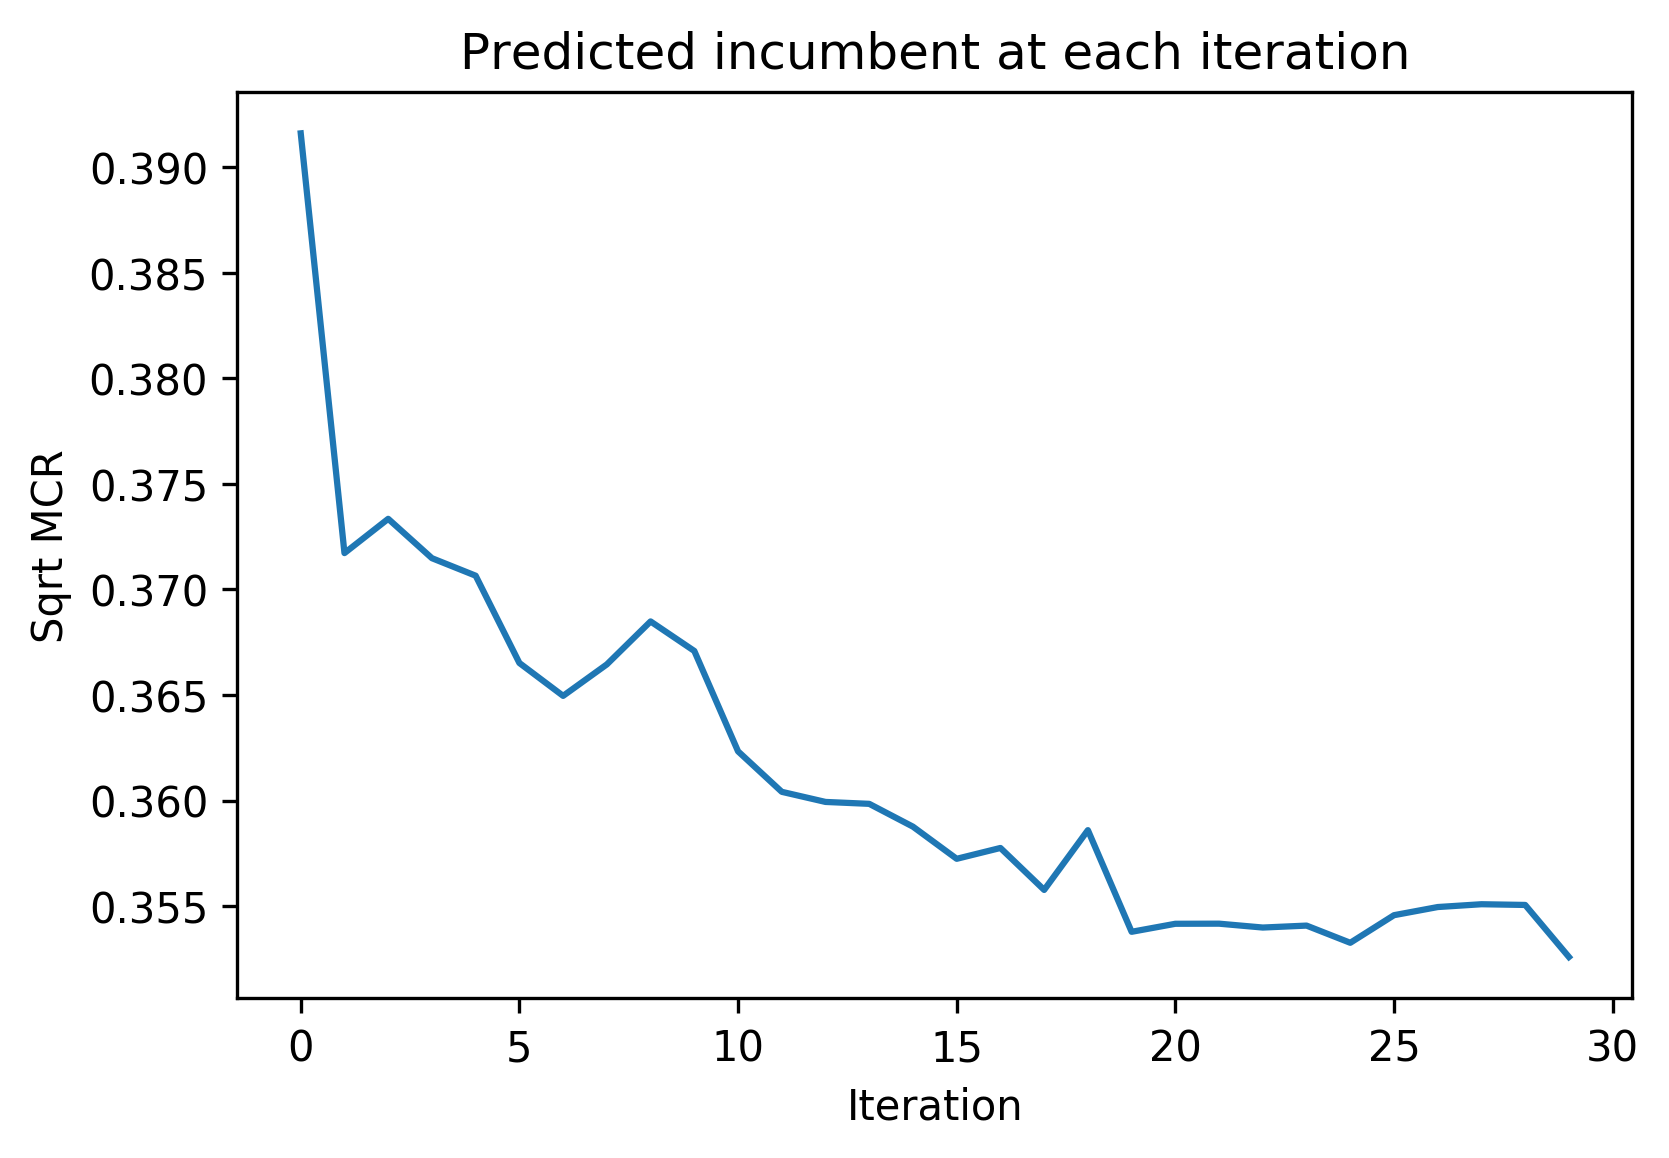

In [8]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

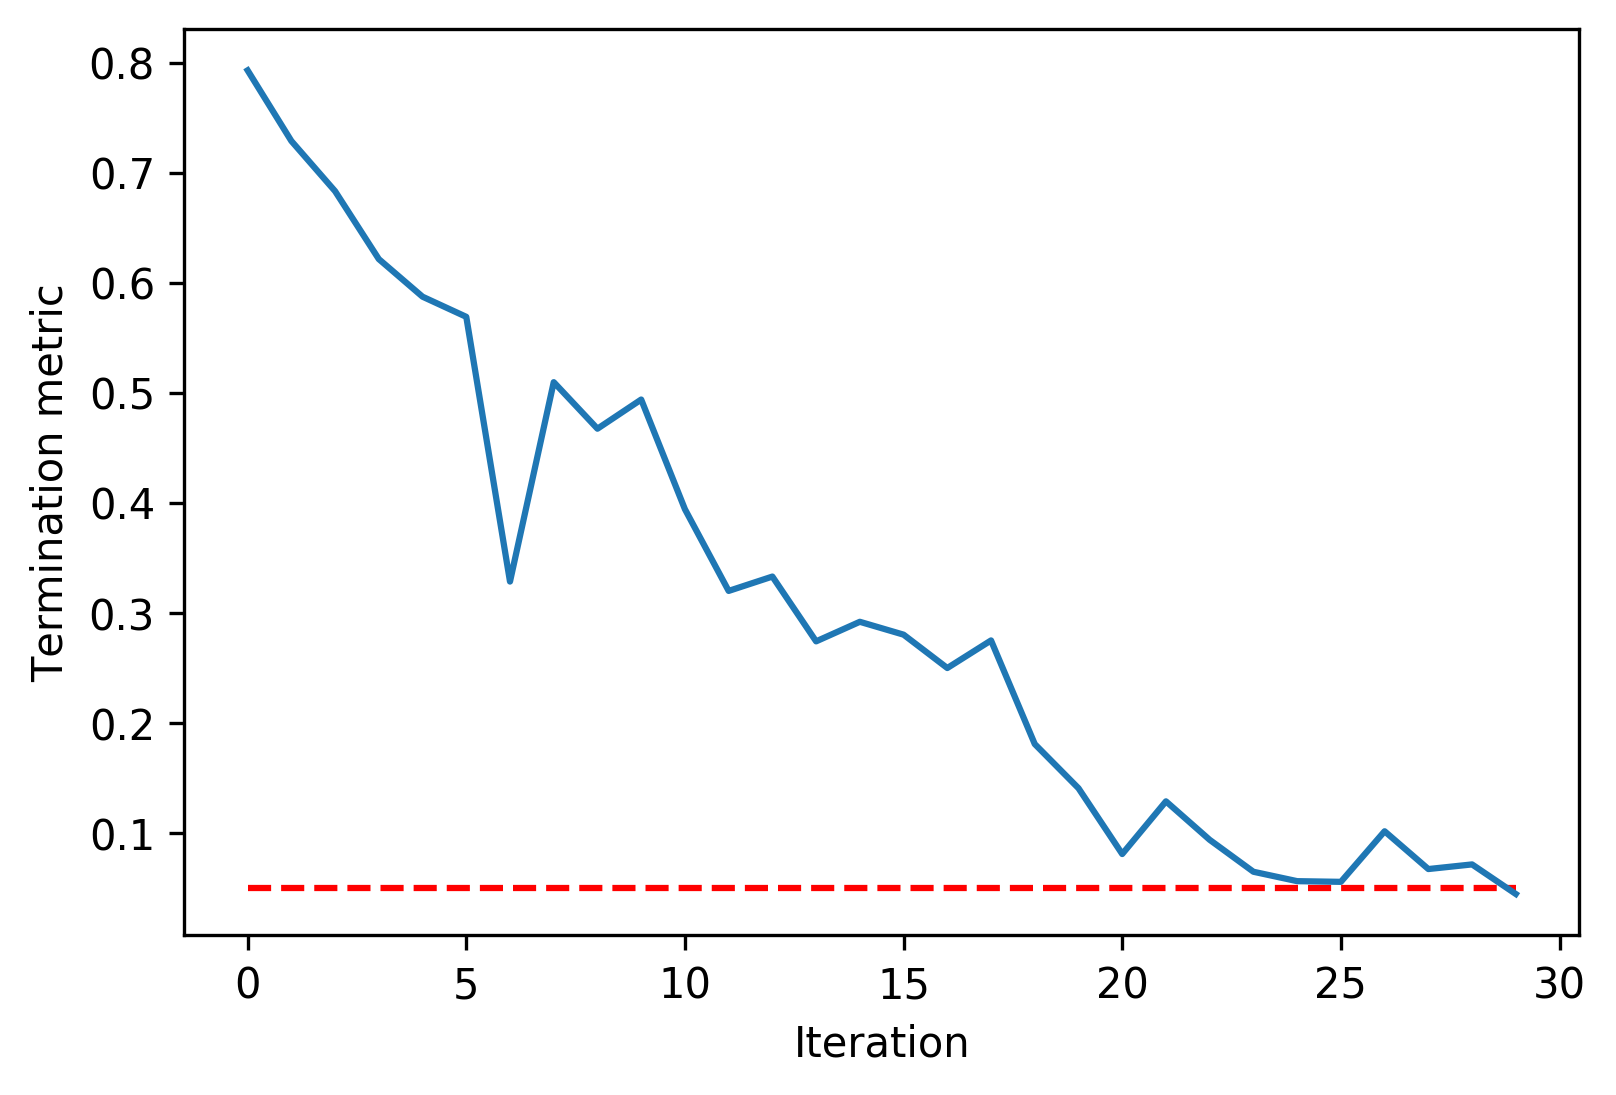

In [9]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()